In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
n_measurements = 10

velocities = np.zeros((n_measurements, 10))

for i in range(n_measurements):
    for r_i, r in enumerate(np.arange(0.1, 1.01, 0.1)):
        data = pd.read_csv(f'seperate_{i}/rate_{round(r, 1)}.csv')
        data_in_range = data[(data['time'] > 20) & (data['x'] > 0) & (data['x'] < 30) & (data['y'] > 0) & (data['y'] < 5)]
        
        displacement = data_in_range.groupby('pedestrian_id').agg({'x': 'diff', 'y': 'diff'})
        velocities[i, r_i] = np.mean(np.sqrt(displacement['x']**2 + displacement['y']**2) / 0.1)

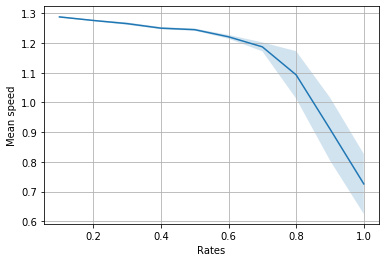

In [11]:
mean = velocities.mean(axis=0)
std = velocities.std(axis=0) / np.sqrt(n_measurements)
plt.plot(np.arange(0.1, 1.01, 0.1), mean)
plt.fill_between(np.arange(0.1, 1.01, 0.1), mean - std, mean + std, alpha=0.2)
plt.ylabel('Mean speed')
plt.xlabel('Rates')
plt.grid()
plt.savefig('plots/s_speed.png', dpi=150)
plt.show()

In [12]:
velocities

array([[1.2871988 , 1.28177058, 1.25860658, 1.27273908, 1.24405548,
        1.21065838, 1.1707202 , 1.19398479, 0.3220379 , 1.08236491],
       [1.29672589, 1.26838983, 1.28471345, 1.23765084, 1.22440014,
        1.23448265, 1.1341294 , 1.13217526, 1.17200332, 1.1376827 ],
       [1.29283149, 1.26815462, 1.25422496, 1.24463876, 1.25199196,
        1.18515182, 1.18464612, 1.19290675, 1.10427194, 0.19012125],
       [1.27949633, 1.28504865, 1.24652587, 1.24400248, 1.25360136,
        1.22853716, 1.20276361, 1.2048383 , 0.32561551, 0.50033933],
       [1.27689004, 1.27492925, 1.2740905 , 1.24460997, 1.23737062,
        1.25070524, 1.2294765 , 1.17239957, 1.15574875, 1.12689071],
       [1.28947089, 1.27907166, 1.27250173, 1.24610034, 1.25198899,
        1.23432015, 1.22601505, 0.33953485, 0.98740971, 0.65239376],
       [1.28970567, 1.28068992, 1.27861464, 1.2679986 , 1.26059613,
        1.23650478, 1.22623231, 1.19111704, 1.14252079, 0.64689589],
       [1.29368168, 1.28027735, 1.2595585